# INNOMATICS TASK - Sentiment Analysis of Real-time Flipkart Product Reviews

The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.

Dataset Used : Real-time data from Flipkart website. The dataset consists of 8,518 reviews for the "YONEX MAVIS 350 Nylon Shuttle" product from Flipkart. Each review includes features such as Reviewer Name, Rating, Review Title, Review Text, Place of Review, Date of Review, Up Votes, and Down Votes.


**Major Steps Involved:**
Data Preprocessing
1. Text Cleaning: Remove special characters, punctuation, and stopwords from the review text.
2. Text Normalization: Perform lemmatization or stemming to reduce words to their base forms.
3. Numerical Feature Extraction: Apply techniques like Bag-of-Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), Word2Vec (W2V), and BERT models for feature extraction.

Modeling Approach used 
1. Model Selection: Train and evaluate various machine learning and deep learning models using the embedded text data.
2. Evaluation Metric: Use the F1-Score as the evaluation metric to assess the performance of the models in classifying sentiment.

Model Deployment
1. Flask or Streamlit App Development: Develop a Flask or Streamlit web application that takes user input in the form of a review and generates the sentiment (positive or negative) of the review.
2. Model Integration: Integrate the trained sentiment classification model into the Flask or Streamlit app for real-time inference.
3. Deployment: Deploy the Flask or Streamlit app on an AWS EC2 instance to make it accessible over the internet.

The steps mentioned below are followed:
1. Data Loading and Analysis: Gain insights into product features that contribute to customer satisfaction or dissatisfaction.
2. Data Cleaning: Preprocess the review text by removing noise and normalizing the text.
3. Text Embedding: Experiment with different text embedding techniques to represent the review text as numerical vectors.
4. Model Training: Train machine learning and deep learning models on the embedded text data to classify sentiment.
5. Model Evaluation: Evaluate the performance of the trained models using the F1-Score metric.
6. Flask or Streamlit App Development: Develop a Flask or Streamlit web application for sentiment analysis of user-provided reviews.
7. Model Deployment: Deploy the trained sentiment classification model along with the Flask or Streamlit app on an AWS EC2 instance.
8. Testing and Monitoring: Test the deployed application and monitor its performance for any issues or errors.



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Analysis

In [2]:
df = pd.read_csv("D:\\Innomatics\\Flipkart_data\\reviews_badminton\\data.csv")

df.tail(100)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8418,Lovish,Pretty good,"Certified Buyer, Chandigarh",0.0,0.0,Oct 2016,Good shuttleREAD MORE,5
8419,nilesh,Nice,"Certified Buyer, Onda",0.0,0.0,Oct 2016,Shipping should be freeREAD MORE,3
8420,Flipkart Customer,Wonderful,"Certified Buyer, Bangalore",0.0,0.0,Oct 2016,Product is very good in quality.READ MORE,5
8421,Pradeep Gandu,Just wow!,"Certified Buyer, Hyderabad",0.0,0.0,Oct 2016,awesome deal at awesome price...love itREAD MORE,5
8422,VINOD KUMAR MISHRA,Classy product,"Certified Buyer, Sedam",0.0,0.0,Oct 2016,Good product in right app......READ MORE,5
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
df.shape

(8518, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [6]:
df['Month'] = pd.to_datetime(df['Month'])

C:\Users\THANUJA\AppData\Local\Temp\ipykernel_3472\3666255603.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'])


In [7]:
df.fillna({'Reviewer Name': 'NA', 
           'Review Title': 'NA', 
           'Place of Review': 'NA', 
           'Up Votes': df['Up Votes'].mean(), 
           'Down Votes': df['Down Votes'].mean(), 
           'Month': 'NA'}, 
          inplace=True)

In [8]:
df.isnull().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        8
Ratings            0
dtype: int64

In [9]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d', errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Reviewer Name    8518 non-null   object        
 1   Review Title     8518 non-null   object        
 2   Place of Review  8518 non-null   object        
 3   Up Votes         8518 non-null   float64       
 4   Down Votes       8518 non-null   float64       
 5   Month            8053 non-null   datetime64[ns]
 6   Review text      8510 non-null   object        
 7   Ratings          8518 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 532.5+ KB


### Exploratory Data Analysis

In [11]:
#For numerical columns
df.describe()

,Up Votes,Down Votes,Month,Ratings
count,8518.000000,8518.000000,8053,8518.000000
mean,0.391396,0.121768,2019-12-11 02:10:53.570098432,4.181028
min,0.000000,0.000000,2015-12-01 00:00:00,1.000000
25%,0.000000,0.000000,2018-10-01 00:00:00,4.000000
50%,0.000000,0.000000,2020-02-01 00:00:00,5.000000
75%,0.000000,0.000000,2021-02-01 00:00:00,5.000000
max,889.000000,219.000000,2022-11-01 00:00:00,5.000000
std,11.607089,3.246115,NaN,1.262200


<Axes: >

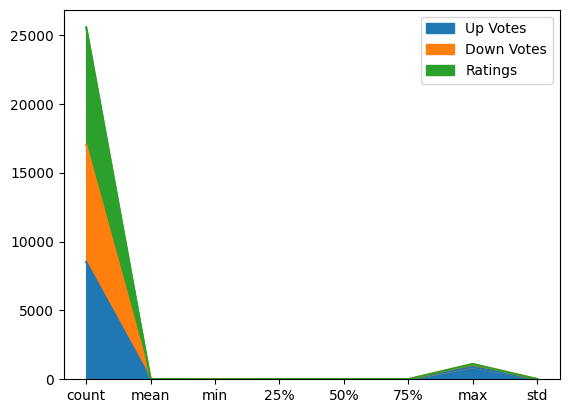

In [12]:
df.describe().plot(kind='area')

In [13]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,2021-02-01,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,2021-02-01,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,2021-04-01,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaT,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NA,147.0,24.0,2016-04-01,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [14]:
df['Place of Review'].value_counts()

Place of Review
Certified Buyer, Bengaluru          319
Certified Buyer, Hyderabad          251
Certified Buyer, Chennai            240
Certified Buyer, Bangalore          212
Certified Buyer, New Delhi          155
                                   ... 
Certified Buyer, Dhubri District      1
Certified Buyer, Kathanian            1
Certified Buyer, Rajnagar             1
Certified Buyer, Gundlupet            1
Certified Buyer, Raebareli            1
Name: count, Length: 2338, dtype: int64

<Axes: ylabel='count'>

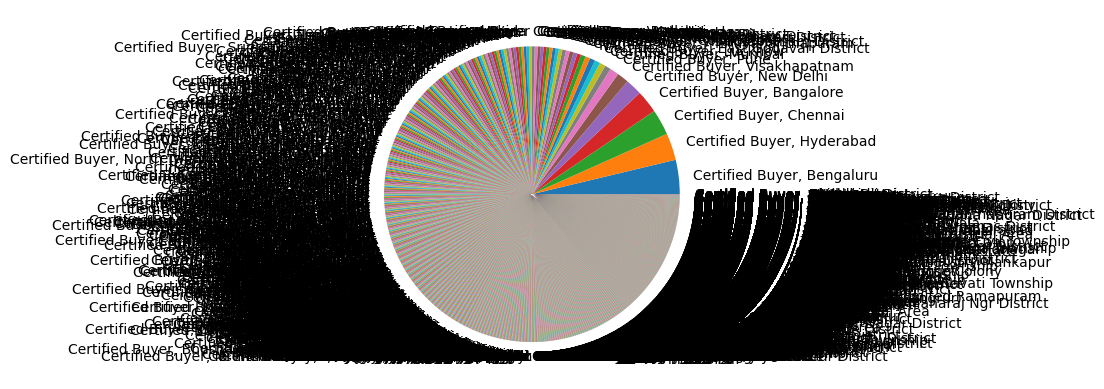

In [15]:
df['Place of Review'].value_counts().plot.pie()

In [16]:
df['Ratings'].value_counts()

Ratings
5    5080
4    1746
1     769
3     615
2     308
Name: count, dtype: int64

<Axes: xlabel='Ratings', ylabel='count'>

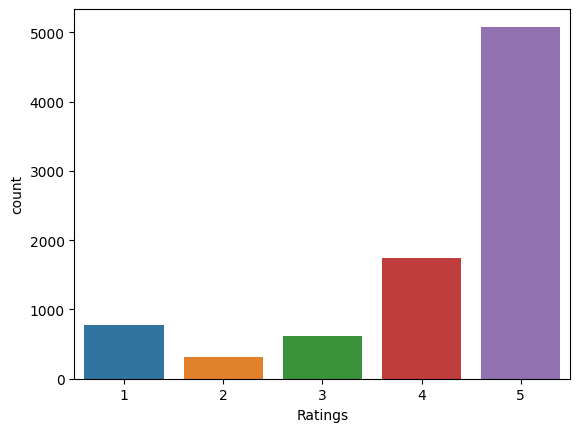

In [17]:
sns.countplot(x=df['Ratings'])

<Axes: >

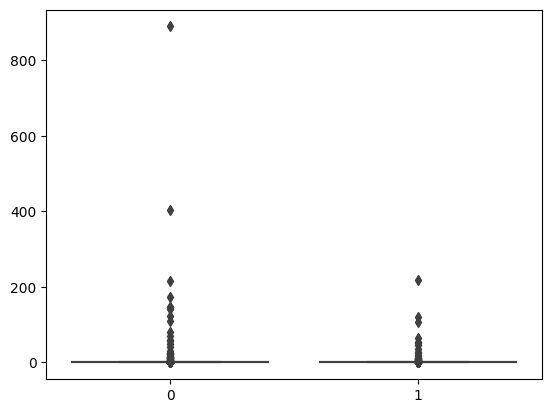

In [18]:
sns.boxplot(data=df[['Up Votes', 'Down Votes']].values, orient='v')

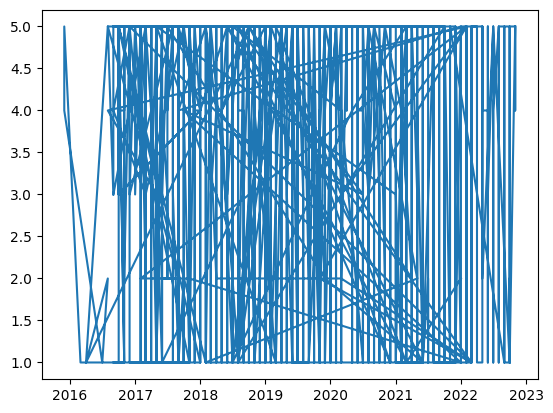

In [19]:
plt.plot(df['Month'], df['Ratings'])

Now, let's create a column 'Sentiment' using VADER (Valence Aware Dictionary and sentiment Reasoner):
-Designed specifically for sentiment analysis of social media text, making it well-suited for short and informal texts like tweets.
-Incorporates lexicons of sentiment-related words and their intensity scores, along with rules-based heuristics for sentiment classification.
-Provides a compound score that represents the overall sentiment intensity of a text.

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Define a function to classify sentiment
def get_sentiment(text):
    if pd.isnull(text):
        return 'neutral'  # Handle missing values
    # Get the polarity scores for the text
    scores = sid.polarity_scores(text)
    # Classify sentiment as positive, negative, or neutral based on compound score
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create the 'Sentiment' column
df['Sentiment'] = df['Review text'].apply(get_sentiment)

# Display the DataFrame with the new 'Sentiment' column
print(df[['Review text', 'Sentiment']])


                                            Review text Sentiment
0     Nice product, good quality, but price is now r...  positive
1     They didn't supplied Yonex Mavis 350. Outside ...  negative
2     Worst product. Damaged shuttlecocks packed in ...  negative
3     Quite O. K. , but nowadays  the quality of the...  positive
4     Over pricedJust â?¹620 ..from retailer.I didn'...  positive
...                                                 ...       ...
8513                                                NaN   neutral
8514                                                NaN   neutral
8515                                                NaN   neutral
8516                                                NaN   neutral
8517                                                NaN   neutral

[8518 rows x 2 columns]


In [21]:
df['Sentiment'].value_counts()

Sentiment
positive    3972
neutral     3759
negative     787
Name: count, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

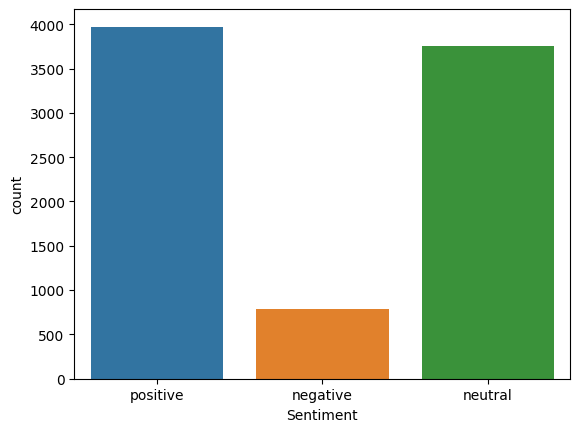

In [22]:
sns.countplot(x=df['Sentiment'])

In [23]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings', 'Sentiment'],
      dtype='object')

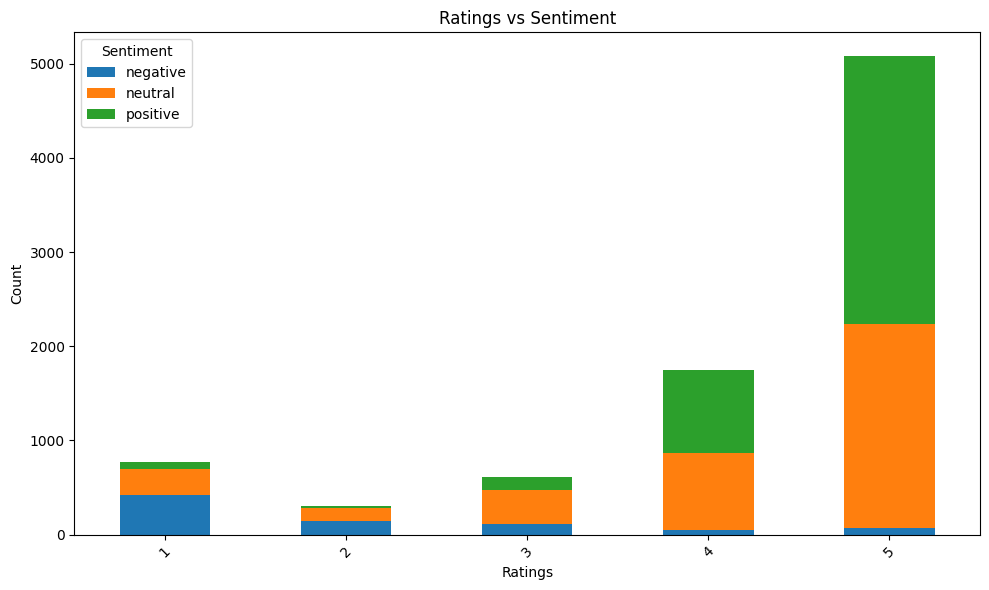

In [24]:
counts = df.groupby(['Ratings', 'Sentiment']).size().unstack(fill_value=0)

# Plotting
counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Ratings vs Sentiment')

# Show plot
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

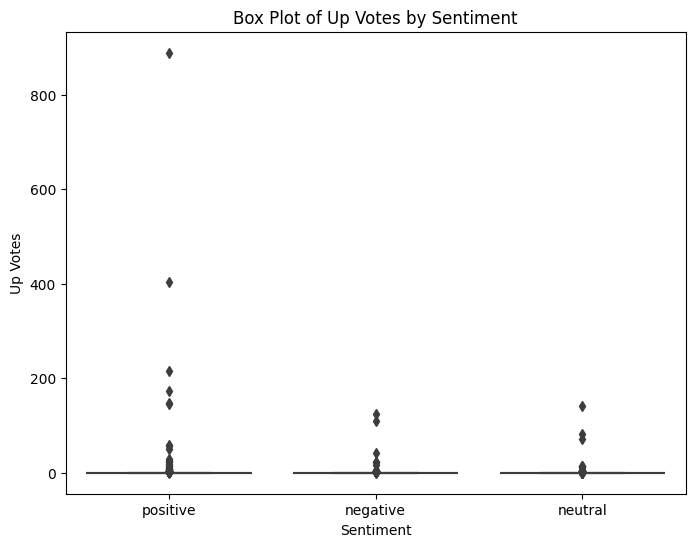

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Up Votes', data=df)

# Add title and labels
plt.title('Box Plot of Up Votes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Up Votes')

# Show the plot
plt.show()

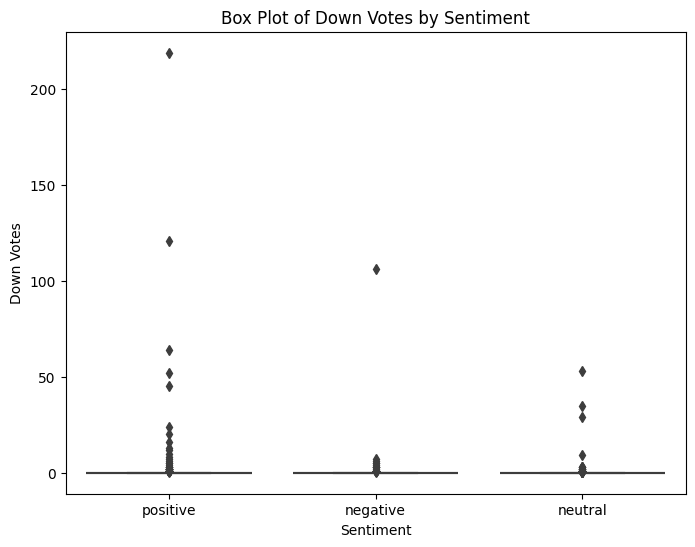

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Down Votes', data=df)

# Add title and labels
plt.title('Box Plot of Down Votes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Down Votes')

# Show the plot
plt.show()

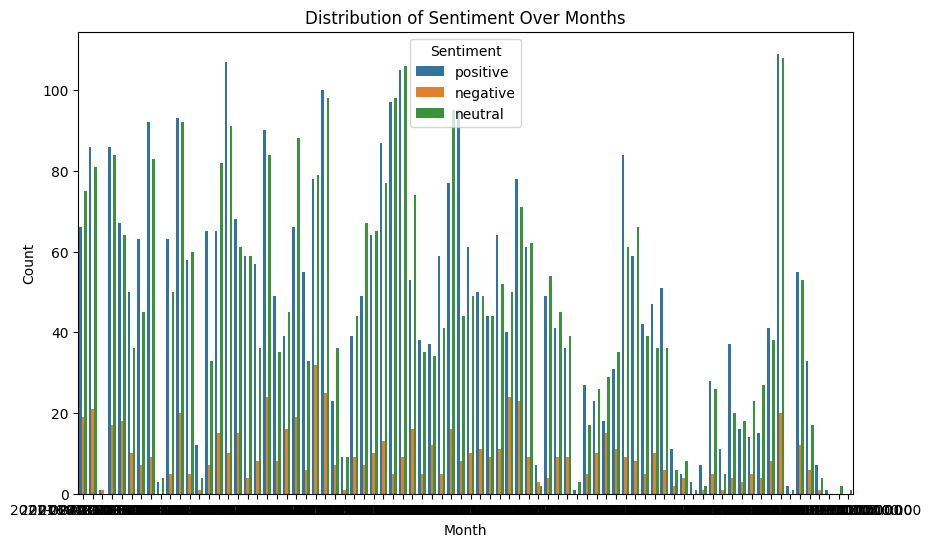

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Sentiment', data=df)

# Add title and labels
plt.title('Distribution of Sentiment Over Months')
plt.xlabel('Month')
plt.ylabel('Count')

# Show the plot
plt.show()

In [28]:
sentiment_mapping = {'negative':1, 'neutral':2, 'positive':3}
df['Sentiment_num'] = df['Sentiment'].map(sentiment_mapping)

In [29]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment,Sentiment_num
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,2021-02-01,"Nice product, good quality, but price is now r...",4,positive,3
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,2021-02-01,They didn't supplied Yonex Mavis 350. Outside ...,1,negative,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,2021-04-01,Worst product. Damaged shuttlecocks packed in ...,1,negative,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaT,"Quite O. K. , but nowadays the quality of the...",3,positive,3
4,ASHIK P A,Over priced,NA,147.0,24.0,2016-04-01,Over pricedJust â?¹620 ..from retailer.I didn'...,1,positive,3


In [30]:
x = df['Review text'] 
y = df.Sentiment_num 


### Data Preparation - Split the data into train and test set

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6388,) (6388,)
(2130,) (2130,)


In [32]:
x_train

4772                                        goodREAD MORE
6742                Good product.Worth for priceREAD MORE
3578                              Original itemsREAD MORE
5321    Not genuine product and all the shuttles were ...
7836                                        GoodREAD MORE
                              ...                        
5734                   genuine & orginal productREAD MORE
5191               Badminton shuttle is too goodREAD MORE
5390                      best quality shuttle 🖤READ MORE
860                                   Nice happyREAD MORE
7270                                Good productREAD MORE
Name: Review text, Length: 6388, dtype: object

### Text Cleaning: Remove special characters, punctuation, and stopwords from the review text.

In [33]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define the clean function
def clean(doc):
    if isinstance(doc, str):
        doc = doc.replace("</br>", " ")
        # Remove chars.
        doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

        # Converting to lower case
        doc = doc.lower()

        # Tokenization
        tokens = nltk.word_tokenize(doc)

        # Lemmatize
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Stop word removal
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

        # Join and return
        return " ".join(filtered_tokens)
    else:
        return ""

# Apply the clean function to each text in X_train
x_train_cleaned = x_train.apply(clean)


In [34]:
x_train_cleaned

4772                                             goodread
6742                          good productworth priceread
3578                                   original itemsread
5321    genuine product shuttle shaped dont buy produc...
7836                                             goodread
                              ...                        
5734                          genuine orginal productread
5191                           badminton shuttle goodread
5390                           best quality shuttle 🖤read
860                                        nice happyread
7270                                     good productread
Name: Review text, Length: 6388, dtype: object

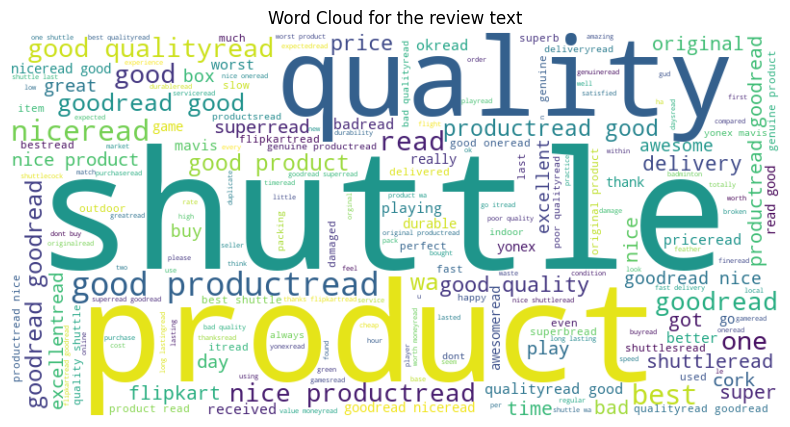

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all cleaned text data into a single string
all_text = ' '.join(x_train_cleaned)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title("Word Cloud for the review text")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


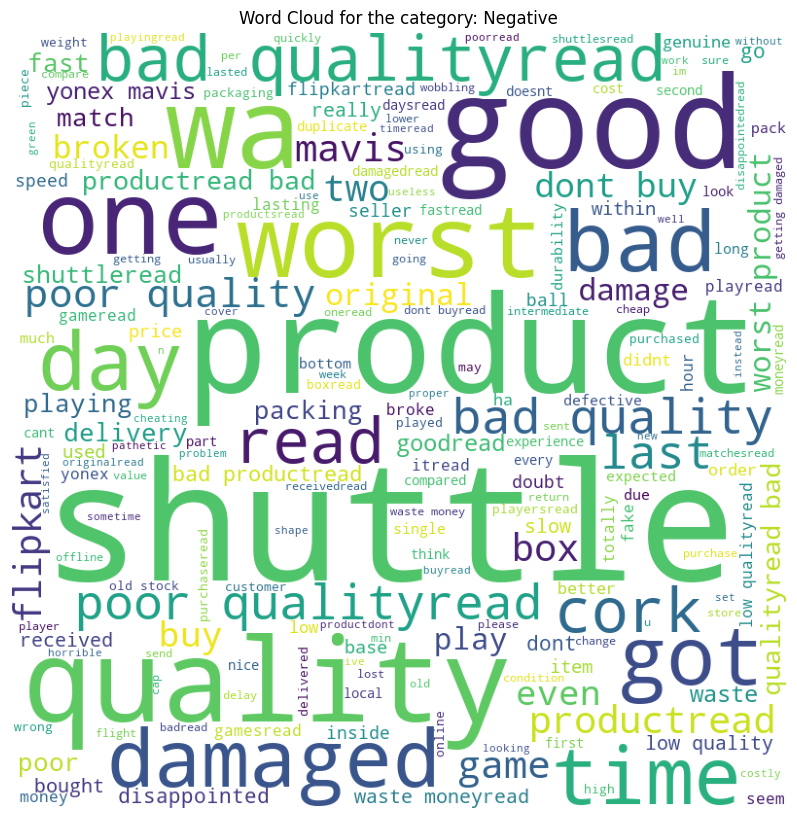

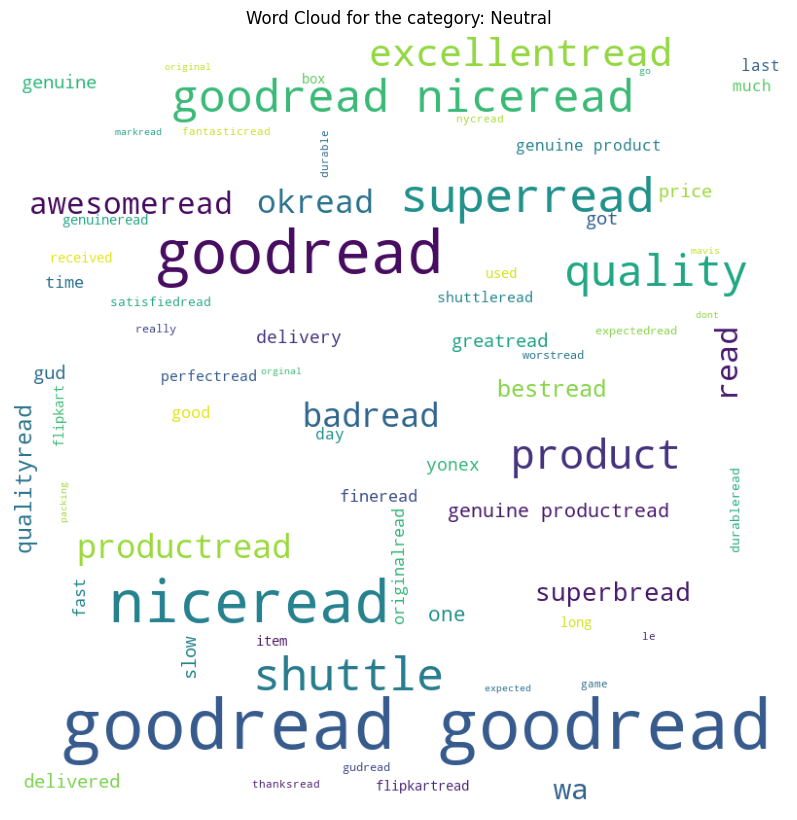

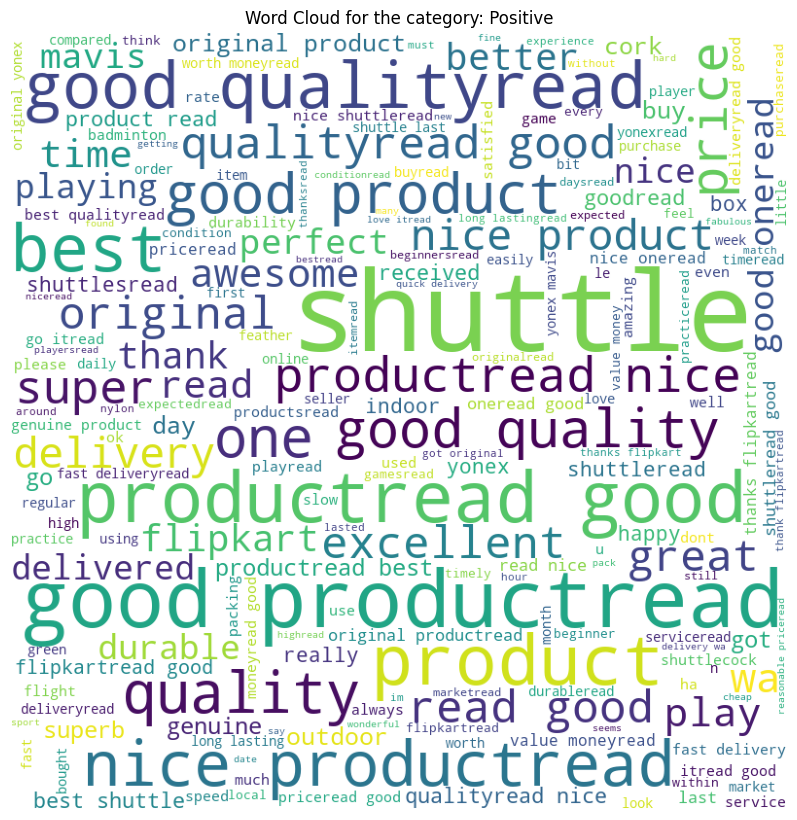

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Filter x_train_cleaned based on sentiment categories
x_train_1 = x_train_cleaned[y_train == 1]
x_train_2 = x_train_cleaned[y_train == 2]
x_train_3 = x_train_cleaned[y_train == 3]

# Generate word clouds for each sentiment category
generate_word_cloud(' '.join(x_train_1), 'Word Cloud for the category: Negative')
generate_word_cloud(' '.join(x_train_2), 'Word Cloud for the category: Neutral')
generate_word_cloud(' '.join(x_train_3), 'Word Cloud for the category: Positive')


### Text Embedding

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform X_train_cleaned
x_train_bow = vectorizer.fit_transform(x_train_cleaned)

# Check the shape of the matrix
print("Shape of BoW matrix:", x_train_bow.shape)


Shape of BoW matrix: (6388, 3004)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform X_train_cleaned
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train_cleaned)

# Check the shape of the matrix
print("Shape of TF-IDF matrix:", x_train_tfidf.shape)


Shape of TF-IDF matrix: (6388, 3004)


In [38]:
x_test_cleaned = x_test.apply(clean)

In [39]:
# Fit
x_test_bow = vectorizer.transform(x_test_cleaned)

# Check the shape of the matrix
print("Shape of BoW matrix:", x_test_bow.shape)

Shape of BoW matrix: (2130, 3004)


In [40]:
x_test_tfidf = tfidf_vectorizer.transform(x_test_cleaned)

# Check the shape of the matrix
print("Shape of TF-IDF matrix:", x_test_tfidf.shape)

Shape of TF-IDF matrix: (2130, 3004)


### Model Training & Model Evaluation

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [59]:
from sklearn.metrics import f1_score

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train_bow, y_train)
lr_preds_bow = lr_model.predict(x_test_bow)
lr_f1 = f1_score(y_test, lr_preds_bow, average='weighted')
print("Logistic Regression F1-Score:", lr_f1)

from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_bow, y_train)
dt_preds_bow = dt_model.predict(x_test_bow)
dt_f1 = f1_score(y_test, dt_preds_bow, average='weighted')
print("Decision Tree F1-Score:", dt_f1)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(x_train_bow, y_train)
svm_preds_bow = svm_model.predict(x_test_bow)
svm_f1 = f1_score(y_test, svm_preds_bow, average='weighted')
print("SVM F1-Score:", svm_f1)

# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(x_train_bow, y_train)
nb_preds_bow = nb_model.predict(x_test_bow)
nb_f1 = f1_score(y_test, nb_preds_bow, average='weighted')
print("Multinomial Naive Bayes F1-Score:", nb_f1)


Logistic Regression F1-Score: 0.9373824472174499
Decision Tree F1-Score: 0.9428646972291004
SVM F1-Score: 0.9269468378384462
Multinomial Naive Bayes F1-Score: 0.874243858238812


In [60]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train_tfidf, y_train)
lr_preds_tfidf = lr_model.predict(x_test_tfidf)
lr_f1 = f1_score(y_test, lr_preds_tfidf, average='weighted')
print("Logistic Regression F1-Score (TF-IDF):", lr_f1)

from sklearn.tree import DecisionTreeClassifier
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_tfidf, y_train)
dt_preds_tfidf = dt_model.predict(x_test_tfidf)
dt_f1 = f1_score(y_test, dt_preds_tfidf, average='weighted')
print("Decision Tree F1-Score (TF-IDF):", dt_f1)


# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(x_train_tfidf, y_train)
svm_preds_tfidf = svm_model.predict(x_test_tfidf)
svm_f1 = f1_score(y_test, svm_preds_tfidf, average='weighted')
print("SVM F1-Score (TF-IDF):", svm_f1)

# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(x_train_tfidf, y_train)
nb_preds_tfidf = nb_model.predict(x_test_tfidf)
nb_f1 = f1_score(y_test, nb_preds_tfidf, average='weighted')
print("Multinomial Naive Bayes F1-Score (TF-IDF):", nb_f1)

Logistic Regression F1-Score (TF-IDF): 0.9332404428285221
Decision Tree F1-Score (TF-IDF): 0.9342887942989623
SVM F1-Score (TF-IDF): 0.9377480121939785
Multinomial Naive Bayes F1-Score (TF-IDF): 0.8530968039672711


In [58]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

In [ ]:
import joblib
from joblib import Memory
import os

In [62]:
x_train_clean = x_train.apply(lambda doc: clean(doc))

In [63]:
x_test_clean = x_test.apply(lambda doc: clean(doc))

In [57]:
import warnings

warnings.filterwarnings('ignore')

In [68]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
    {
        'vectorization': [CountVectorizer(), TfidfVectorizer()],
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__C': [0.1, 1],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['saga'],
        'classifier__class_weight': [None, 'balanced']
    }
]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1_micro', 
                               return_train_score=True,
                               verbose=1
                              )
    
    grid_search.fit(x_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(x_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score on Test Data:  0.8723004694835681
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Score on Test Data:  0.9417840375586854
********** logistic_regression **********
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Score on Test Data:  0.939906103286385


In [69]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1000)),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', solver='saga'))])



In [73]:
from sklearn import metrics

for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'D:\Innomatics\Sentiment_analysis_ML\\{name}.pkl')
    model = joblib.load(f'D:\Innomatics\Sentiment_analysis_ML\\{name}.pkl')
    
    y_test_pred = model.predict(x_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred,average='micro'))

********** naive_bayes **********
Test Score (F1) 0.8723004694835681
********** decision_tree **********
Test Score (F1) 0.9417840375586854
********** logistic_regression **********
Test Score (F1) 0.939906103286385
